In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# multiple prints in a single cell
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

In [22]:
QUANTILE_LIST = [0, 0.01, 0.03, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.97, 0.99, 1]

In [13]:
retail_df = pd.read_csv('OnlineRetail.csv', encoding = 'unicode_escape')

retail_df.shape
retail_df.head(3)

(541909, 8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [14]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

In [15]:
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [19]:
{col: retail_df[col].nunique() for col in retail_df.columns}
{col: retail_df[col].isna().sum() for col in retail_df.columns}

{'InvoiceNo': 25900,
 'StockCode': 4070,
 'Description': 4223,
 'Quantity': 722,
 'InvoiceDate': 23260,
 'UnitPrice': 1630,
 'CustomerID': 4372,
 'Country': 38}

{'InvoiceNo': 0,
 'StockCode': 0,
 'Description': 1454,
 'Quantity': 0,
 'InvoiceDate': 0,
 'UnitPrice': 0,
 'CustomerID': 135080,
 'Country': 0}

In [18]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [23]:
retail_df['UnitPrice'].quantile(QUANTILE_LIST).to_frame().T

,0.00,0.01,0.03,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.97,0.99,1.00
UnitPrice,-11062.06,0.19,0.39,0.42,0.63,1.25,2.08,4.13,7.95,9.95,12.75,18.0,38970.0


In [30]:
l_thresh = retail_df['UnitPrice'].quantile(0.01)
h_thresh = retail_df['UnitPrice'].quantile(0.99)
x = retail_df[(retail_df['UnitPrice'] >= l_thresh) & (retail_df['UnitPrice'] <= h_thresh)]['UnitPrice'].to_list()

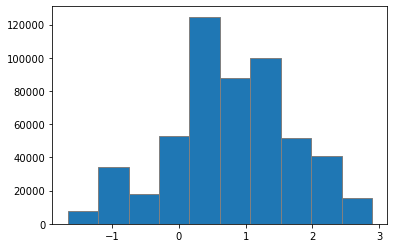

In [32]:
plt.hist(np.log(x), edgecolor = 'grey')
plt.show();